<a href="https://colab.research.google.com/github/Satan07/LGMVIP-DataScience/blob/main/INTERMEDIATE_LEVEL_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **DATA SCIENCE INTERN AT LETSGROWMORE LGMVIPDECEMBER 2021 BATCH**

**NAME: SATYAM PALKAR**

**INTERMEDIATE LEVEL TASK1 :  Exploratory-Data-Analysis-on-Dataset--Terrorism**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import pandas as pd
data=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,114,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
16576,198207150003,1982,7,15,NaN,0,NaN,69,France,8,Western Europe,Corsica,L'Ile-Rousse,42.636510,8.937046,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,8.0,Hotel/Resort,NaN,German owned hotel,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
16577,198207150004,1982,7,15,NaN,0,NaN,69,France,8,Western Europe,Corsica,Ajaccio,41.930607,8.742907,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,2.0,Restaurant/Bar/Café,NaN,restaurants,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
16578,198207150005,1982,7,15,NaN,0,NaN,98,Italy,8,Western Europe,Campania,Naples,40.840097,14.251636,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Naples,"Antonio Ammaturo, 57, Head of Mobile Police Force",...,NaN,NaN,Automatic firearms; Pistol,2.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
16579,198207150006,1982,7,15,NaN,0,NaN,159,Peru,3,South America,Ayacucho,Ayacucho district,-14.318840,-74.378173,3,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,NaN,Civilian,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
16580,198207160001,1982,7,16,NaN,0,NaN,185,Spain,8,Western Europe,Basque Country,Vitoria,42.849640,-2.692359,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",NaN,Police Bldg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 17.1+ MB


In [6]:
data.describe()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.658100e+04,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,15975.000000,15975.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,2299.000000,16581.000000,16581.000000,16581.000000,16581.000000,26.000000,2.000000,16581.000000,15612.000000,16530.000000,218.000000,157.000000,189.000000,27.000000,17.000000,27.000000,0.0,0.0,0.0,16580.000000,35.000000,0.0,16580.000000,3384.000000,934.000000,...,238.000000,9.000000,8.000000,0.0,0.0,0.0,18.000000,16580.000000,13343.000000,1038.000000,878.000000,145.000000,126.000000,25.00000,22.000000,13830.000000,1369.000000,1458.000000,12406.000000,1339.000000,1321.000000,16580.000000,7652.000000,3.803000e+03,16415.000000,1393.000000,1393.000000,403.000000,289.000000,16316.000000,4.170000e+02,1.0,8.800000e+01,1.0,638.000000,486.000000,16580.000000,16580.000000,16580.000000,16580.000000
mean,1.978029e+11,1977.966045,6.201978,15.155962,0.020445,183.120258,5.524878,27.875821,-28.932087,1.253543,0.010494,0.988481,0.990531,0.890477,-1.554912,1.269682,0.042579,0.907665,0.000060,3.166757,4.884615,3.000000,6.913938,40.849154,140.546038,9.389908,50.159236,169.031746,8.444444,53.176471,138.074074,NaN,NaN,NaN,0.041737,0.342857,NaN,0.002413,-11.666076,-80.271949,...,4.399160,0.888889,2.750000,NaN,NaN,NaN,0.444444,6.639867,10.637113,6.364162,9.586560,6.179310,6.595238,6.08000,8.772727,1.400362,0.174580,0.353224,1.313074,0.373413,0.062074,0.617793,3.453999,1.858951e+05,0.084861,-12.320890,0.222541,7.361663,26.937716,0.025619,3.793429e+06,20000.0,1.351280e+06,0.0,2.888715,8.341564,-3.738118,-3.693667,0.263450,-2.668034
std,3.266916e+08,3.270107,3.415697,8.949768,0.141521,170.441089,3.372000,22.109249,55.936993,0.905089,0.101904,0.106711,0.096848,0.312304,3.600439,0.560056,0.201912,0.289506,0.007766,2.010886,2.454823,1.414214,6.249739,30.686157,79.496539,6.835748,28.284160,83.474860,5.866026,24.963061,70.642614,NaN,NaN,NaN,0.199994,0.481594,NaN,0.049060,57.411538,39.316957,...,3.001462,0.333333,2.964071,NaN,NaN,NaN,0.511310,2.404941,7.099814,1.888489,6.900079,2.120236,6.243305,1.28841,7.016523,6.684258,1.021435,2.524430,8.044576,2.368088,0.361929,0.838448,0.527484,1.703579e+06,0.278684,130.737644,4.098203,86.859659,67.460711,0.158001,4.932135e+07,NaN,4.853561e+06,NaN,1.280881,28.437426,4.552678,4.601334,0.657961,4.561017
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,8.000000,32.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,5.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976092e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.692880,-86.600964,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000

In [7]:
data.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [8]:
data.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    16560
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       15876
Length: 135, dtype: int64

In [9]:
for i in data.columns:
    print(i, end=" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [10]:
cols = data.columns

In [11]:
cols = []
for i in cols:
    if data[i].isnull().sum() > 1500000:
        cols.append(i)

In [12]:
data = data.drop(cols, axis=1)

In [13]:
data.shape

(16581, 135)

In [14]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [15]:
countries_with_most_terrorism = data.country_txt.value_counts().head(10)
countries_with_most_terrorism

El Salvador       2075
United Kingdom    1965
United States     1668
Spain             1247
Italy             1213
Guatemala         1087
Colombia           869
France             669
Turkey             591
Nicaragua          402
Name: country_txt, dtype: int64

In [16]:
countries = list(countries_with_most_terrorism.index)
countries

['El Salvador',
 'United Kingdom',
 'United States',
 'Spain',
 'Italy',
 'Guatemala',
 'Colombia',
 'France',
 'Turkey',
 'Nicaragua']

Text(0.5, 1.0, 'Countries with most terrorism')

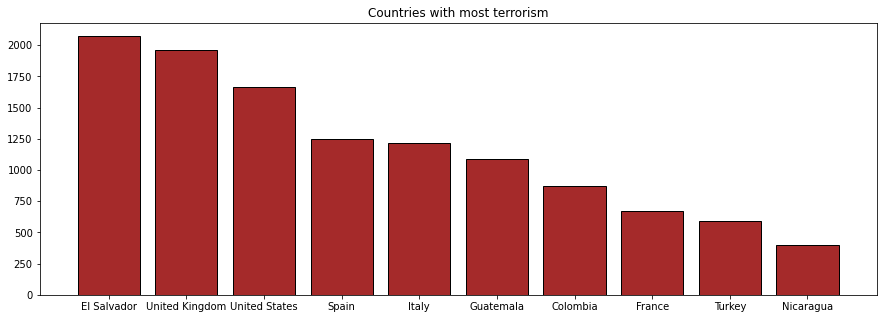

In [17]:
x, y = countries_with_most_terrorism.index, countries_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y,align="center",edgecolor="black",color="brown")
plt.xticks(rotation=0)
plt.title("Countries with most terrorism")

In [18]:
# Filtering country data
data_countries = data[data['country_txt'].isin(countries)]
data_countries.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1,0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1,2.0,Other Crime Type,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),22500.0,Three transformers were damaged.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1,0,NaN,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,4,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",...,NaN,NaN,Firebomb consisting of gasoline,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),60000.0,"Basketball courts, weight room, swimming pool,...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1,0,NaN,"1/3/1970: Karl Armstrong, a member of the New ...",1,1,1,0,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,...,NaN,NaN,Poured gasoline on the floor and lit it with a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Slight damage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
10,197001050001,1970,1,1,NaN,0,NaN,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-8

In [19]:
# Displaying only column names of country data.
data_countries.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [20]:
# Filtering top 10 Countries on which max attacks by terrorists
raw_data = data_countries.iyear.value_counts().head(10)
raw_data

1979    1881
1980    1854
1981    1748
1978    1138
1977    1066
1982     909
1976     663
1975     554
1970     505
1972     407
Name: iyear, dtype: int64

Text(0.5, 1.0, 'Years with most number of terrorism actively.')

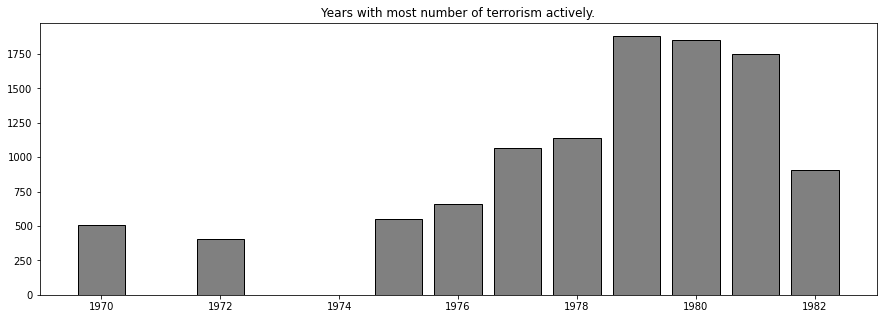

In [41]:
# Displaying years with most number of terrorism activities happend.

year = raw_data
x, y = year.index, year.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "Black", color = "grey")
plt.xticks(rotation=0)
plt.title("Years with most number of terrorism actively.")

Text(0.5, 1.0, 'Type of Target')

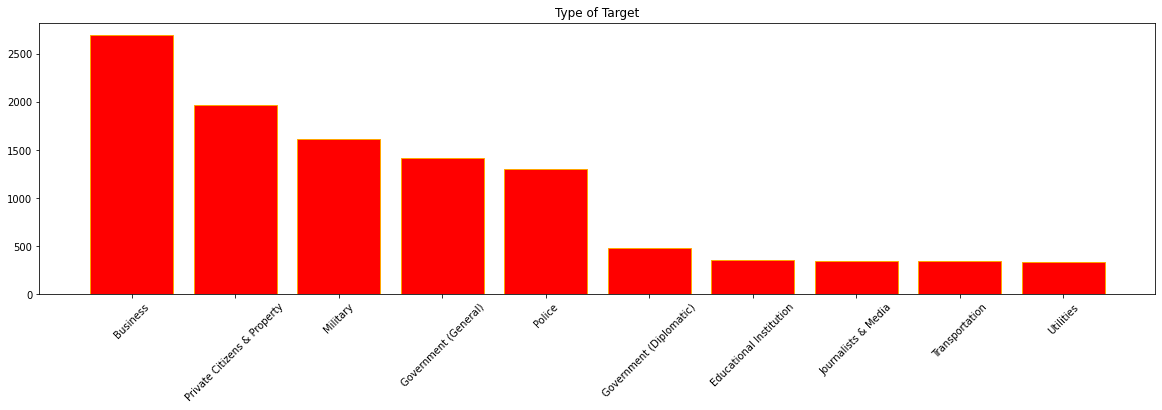

In [40]:
# Top 10 Targets that are attacked most by terrorists

target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(target.index, target.values, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Type of Target")

(-1.1068300730294567,
 1.174873901520891,
 -1.1117640231950492,
 1.1740790511030739)

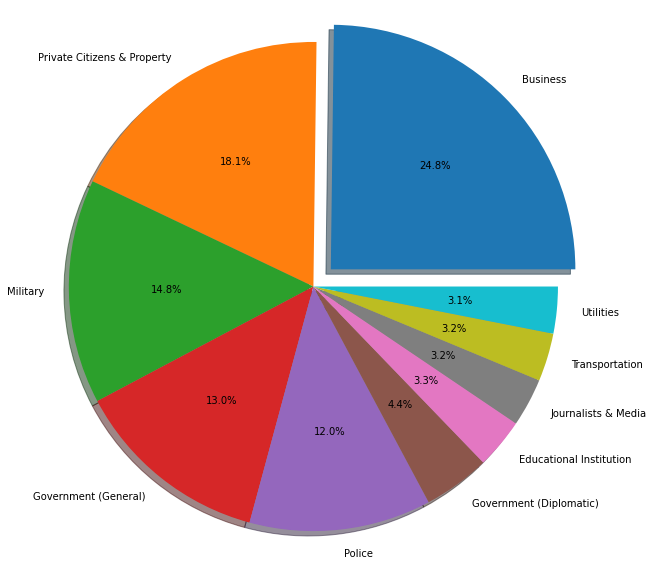

In [23]:
target = data_countries['targtype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,10))
explode = (0.1,0,0,0,0,0,0,0,0,0)  # Only "Explodes" the 2nd slice(i.e. 'Hogs')

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(target.values, explode = explode, labels = target.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

Text(0.5, 1.0, 'Type of Attacks')

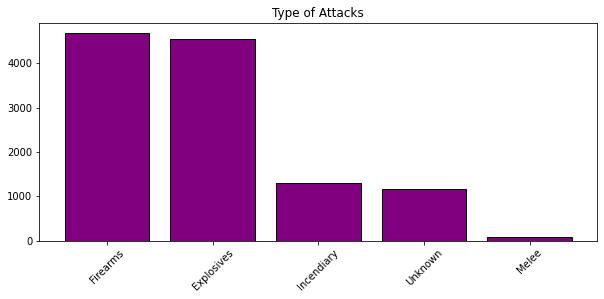

In [39]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fix,ax = plt.subplots(figsize=(10,4))
ax.bar(weapon_types.index, weapon_types.values, edgecolor="black", color = "purple")
plt.xticks(rotation=45)
plt.title("Type of Attacks")

(-1.196491207285833,
 1.1376489961091483,
 -1.1840737385869196,
 1.2212361276777068)

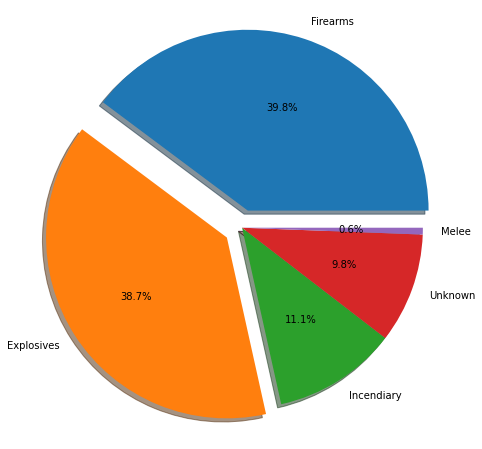

In [27]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

(-1.196491207285833,
 1.1376489961091483,
 -1.1840737385869196,
 1.2212361276777068)

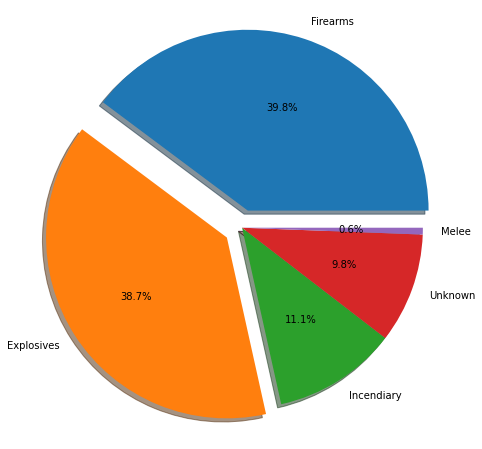

In [28]:
# Top 5 most attacks actioned by terrorists with perticular materials / Weapons.

weapon_types = data_countries["weaptype1_txt"].value_counts().head(5)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0.1,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(weapon_types.values, explode = explode, labels = weapon_types.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [29]:
data.attacktype1_txt.value_counts()

Bombing/Explosion                      7009
Assassination                          3247
Armed Assault                          3071
Facility/Infrastructure Attack         1502
Hostage Taking (Kidnapping)             846
Unknown                                 495
Hostage Taking (Barricade Incident)     283
Hijacking                                98
Unarmed Assault                          30
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Type of Attacks')

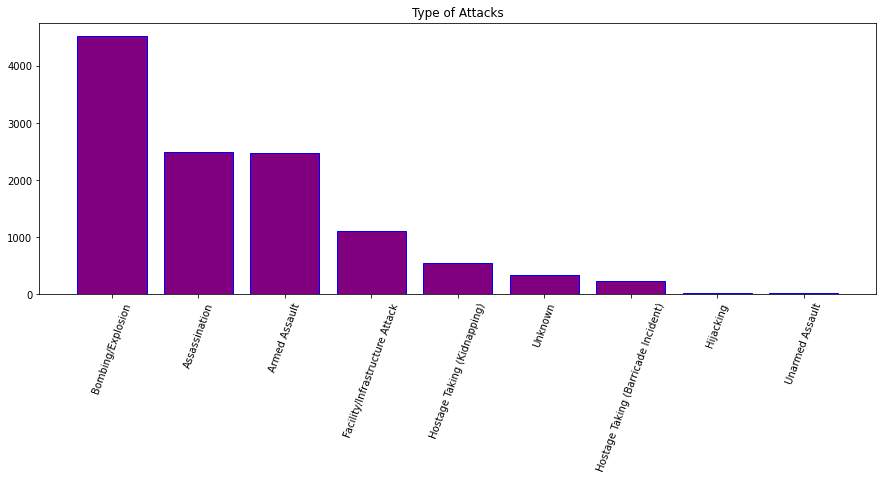

In [38]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(attack_type.index,attack_type.values, edgecolor = "blue", color = "purple")
plt.xticks(rotation=70)
plt.title("Type of Attacks")

(-1.1145653512707474,
 1.1379490967134245,
 -1.1264258802652733,
 1.2196249054111183)

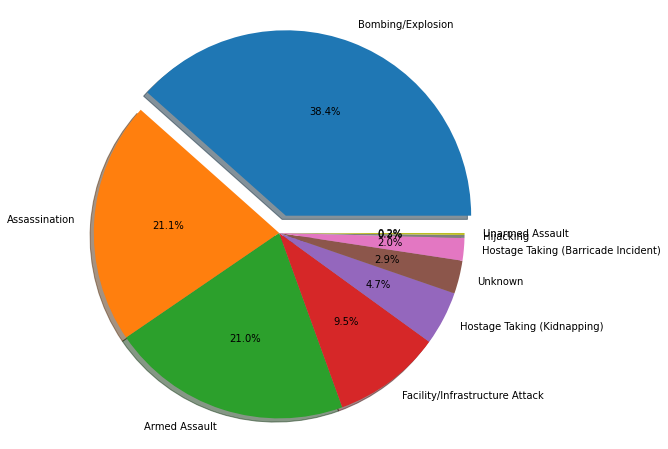

In [31]:
# Top 10 most type of attacks actioned by terrorists.

attack_type=data_countries['attacktype1_txt'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(attack_type.values, explode = explode, labels = attack_type.index, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.

In [32]:
# Top 10 most cities where terrorist attacks actioned by terrorists.

cities_with_most_terrorism = data.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism

Belfast           934
San Salvador      851
Unknown           825
Rome              450
Guatemala City    403
New York City     368
Paris             356
Beirut            275
Madrid            231
Bogota            226
Name: city, dtype: int64

Text(0.5, 1.0, 'Cities with most terrorism')

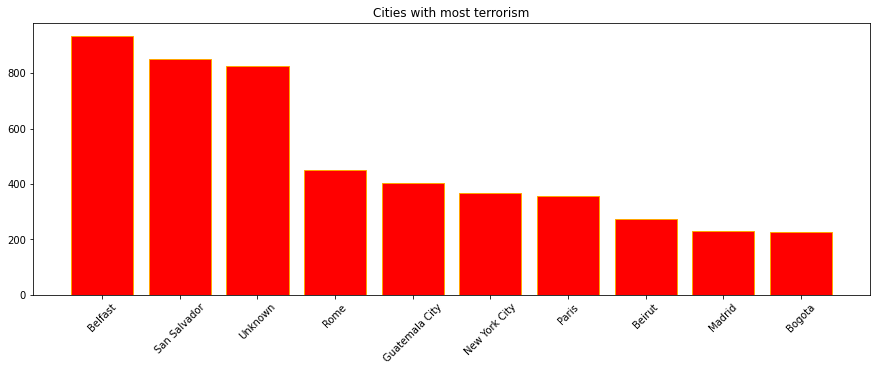

In [37]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

Text(0.5, 1.0, 'Cities with most terrorism')

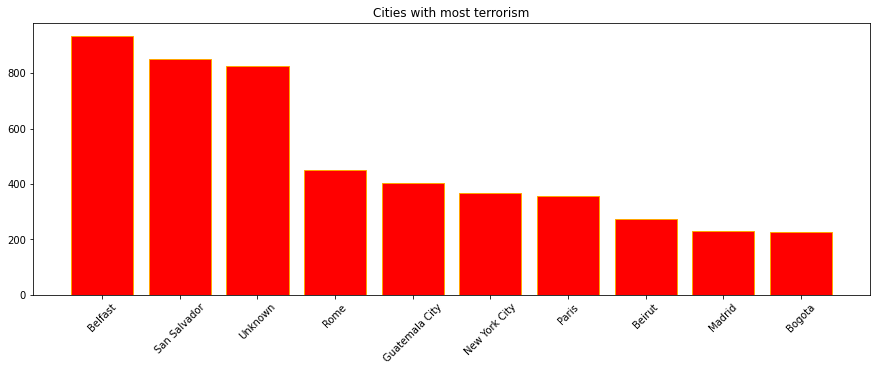

In [36]:
# Graphical representation of top 10 Cities with most terrorism.
x, y = cities_with_most_terrorism.index,cities_with_most_terrorism.values

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x, y, edgecolor = "orange", color = "red")
plt.xticks(rotation = 45)
plt.title("Cities with most terrorism")

In [42]:
religios_target = data[data["targtype1_txt"]=="Religious Figures/Institutions"]
religios_target.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
35,197001280002,1970,1,28,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1,0,Front of building,1/28/1970: Unknown perpetrators detonated an e...,1,1,1,1,2.0,Other Crime Type,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Jewish Synagogue,Temple De Hirsch,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),3000.0,Small hole in the door,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,"""Synagogue Blasted,"" Tri City Herald, January ...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
49,197002060003,1970,2,6,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1,0,NaN,2/6/1970: Unknown perpetrators detonated a bom...,1,1,1,1,2.0,Other Crime Type,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Jewish Synagogue,NaN,...,NaN,NaN,Dynamite,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Door of synagogue damaged and windows shattere...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This might be linked with 197001280002. Both ...,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
117,197003090004,1970,3,9,NaN,0,NaN,217,United States,1,North America,Connecticut,Bridgeport,41.181880,-73.191269,1,0,NaN,3/9/1970: Unknown perpetrators firebombed Shil...,1,1,1,1,2.0,Other Crime Type,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,African American Church,Shiloh Baptist Church,...,NaN,NaN,Firebomb,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Minor damage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
190,197004130003,1970,4,13,NaN,0,NaN,217,United States,1,North America,Missouri,Kansas City,39.176086,-94.574127,1,0,NaN,"4/13/1970: In a series of related attacks, unk...",1,1,1,1,2.0,Other Crime Type,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Linwood Methodist Church,"Linwood Methodist Church, Kansas City",...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),NaN,Natural gas regulator of Church was destroyed....,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Part of a multiple attack with 197004130002 an...,Committee on Government Operations United Stat...,"""Teamster Walkouts Close More Plants,"" Washing...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,"197004130002, 197004130003, 197004130004"
204,197004190001,1970,4,19,NaN,0,NaN,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1,0,Capital Hill Area,"4/19/1970: In a simultaneous bombing campaign,...",1,1,1,0,NaN,NaN,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,15,Religious Figures/Institutions,86.0,Place of Worship,Church,Japanese Presbyterian Church,...,NaN,NaN,All four bombs went off in a span of 90 minutes.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),2

Text(0.5, 1.0, 'Countries with most terrorism on religious Figures')

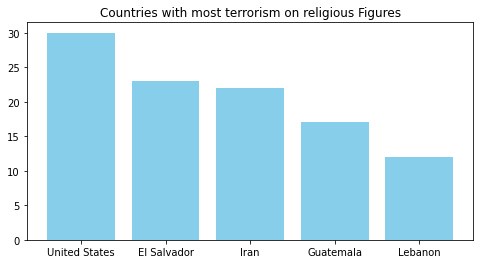

In [43]:
# Graphical representation of top 5 Countries with most terrorism on religious Figures or Institutions.

x, y = religios_target["country_txt"].value_counts().head().index,religios_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x, y, color = "skyblue")
plt.title("Countries with most terrorism on religious Figures")

(-1.115996234800618,
 1.1653703698598077,
 -1.1197900519270867,
 1.193426480817427)

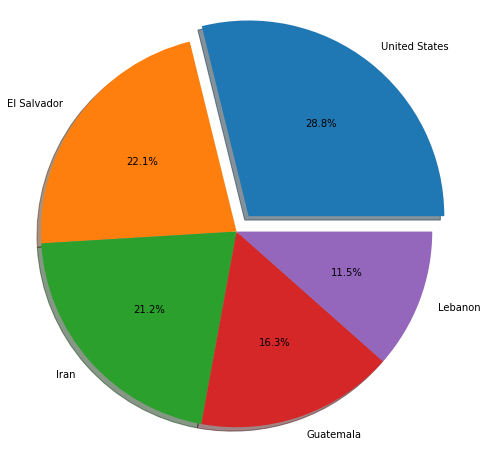

In [44]:
# Top 10 most type of attacks actioned by terrorists.

y, x = religios_target["country_txt"].value_counts().head().index,religios_target["country_txt"].value_counts().head().values

fig, ax = plt.subplots(figsize=(8,8))
explode = (0.1,0,0,0,0)  

#ax.bar(target.index, target.values, color = "skyblue")
ax.pie(x, explode = explode, labels = y, autopct = '%1.1f%%',shadow=True)
ax.axis('equal') # Equals aspect ratio ensures that pie is draen as a circle.